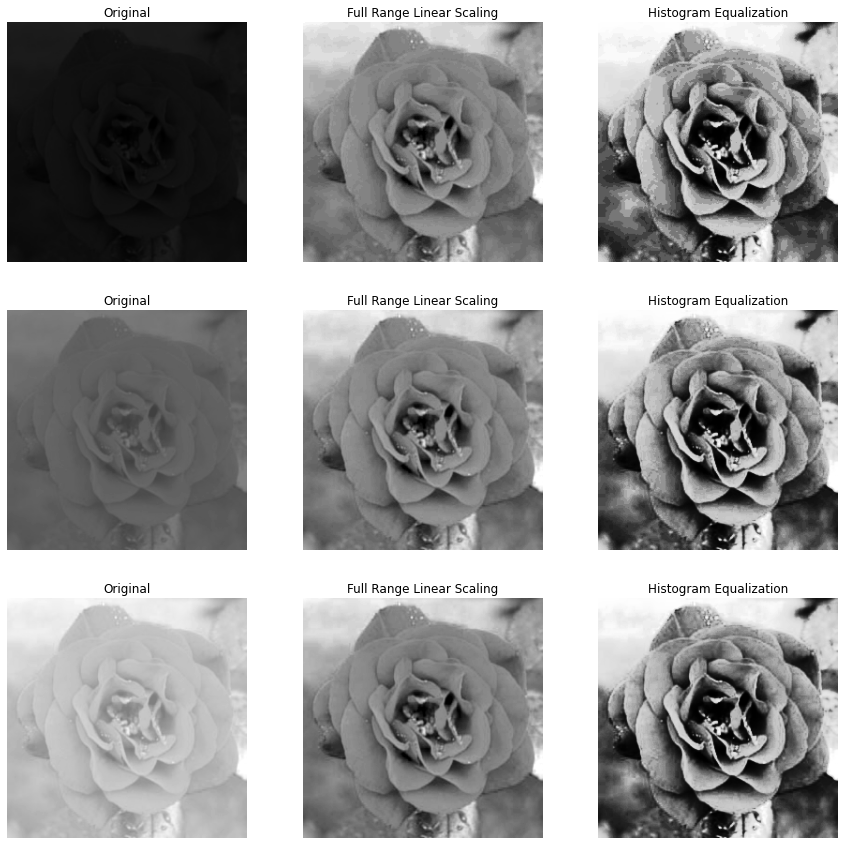

In [2]:
#Problem 2: Image Enhancement
import numpy as np
import matplotlib.pyplot as plt

def read_raw_image(file_path, image_shape):
    # Reading the raw image file and converting it into a numpy array
    return np.fromfile(file_path, dtype=np.uint8).reshape(image_shape)

def full_range_linear_scaling(image):
    # Applying full range linear scaling to enhance the contrast of the image
    min_pixel_value = np.min(image)
    max_pixel_value = np.max(image)
    scaled_image = ((image - min_pixel_value) / (max_pixel_value - min_pixel_value)) * 255
    return scaled_image.astype(np.uint8)

def histogram_equalization_manual(image):
    # Get image dimensions
    height, width = image.shape
    
    # Flatten the image array and initialize the histogram and cumulative distribution function (CDF)
    flat_image = image.flatten()
    histogram = [0] * 256
    cdf = [0] * 256
    
    # Calculate the histogram
    for pixel in flat_image:
        histogram[pixel] += 1
    
    # Calculate the cumulative distribution function (CDF)
    sum_hist = 0
    for i in range(len(histogram)):
        sum_hist += histogram[i]
        cdf[i] = sum_hist
        
    # Normalize the CDF
    cdf_min = min(cdf)
    cdf_max = max(cdf)
    cdf_normalized = [(val - cdf_min) * 255 / (cdf_max - cdf_min) for val in cdf]
    
    # Create the equalized image using the normalized CDF
    equalized_image = [cdf_normalized[pixel] for pixel in flat_image]
    
    # Reshape the equalized image back to the original image shape
    equalized_image = np.array(equalized_image).reshape(height, width).astype('uint8')
    
    return equalized_image

# Paths to the raw image files
image_paths = ["./Project1_Files/Images/rose_dark.raw", "./Project1_Files/Images/rose_mid.raw", "./Project1_Files/Images/rose_bright.raw"]
image_shape = (256, 256)  # Assuming the images are 256x256

# Reading and processing the images
processed_images = []
for path in image_paths:
    img = read_raw_image(path, image_shape)
    scaled_img = full_range_linear_scaling(img)
    equalized_img = histogram_equalization_manual(img)
    processed_images.append((img, scaled_img, equalized_img))



# Function to display images
def display_images(images, titles):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.ravel()
    
    for i in np.arange(0, len(images)*3, 3):
        axs[i].imshow(images[i//3][0], cmap='gray', vmin=0, vmax=255)
        axs[i].set_title(titles[0])
        axs[i].axis('off')
        
        axs[i+1].imshow(images[i//3][1], cmap='gray', vmin=0, vmax=255)
        axs[i+1].set_title(titles[1])
        axs[i+1].axis('off')
        
        axs[i+2].imshow(images[i//3][2], cmap='gray', vmin=0, vmax=255)
        axs[i+2].set_title(titles[2])
        axs[i+2].axis('off')
    
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()


# Displaying the original and processed images
titles = ["Original", "Full Range Linear Scaling", "Histogram Equalization"]
display_images(processed_images, titles)




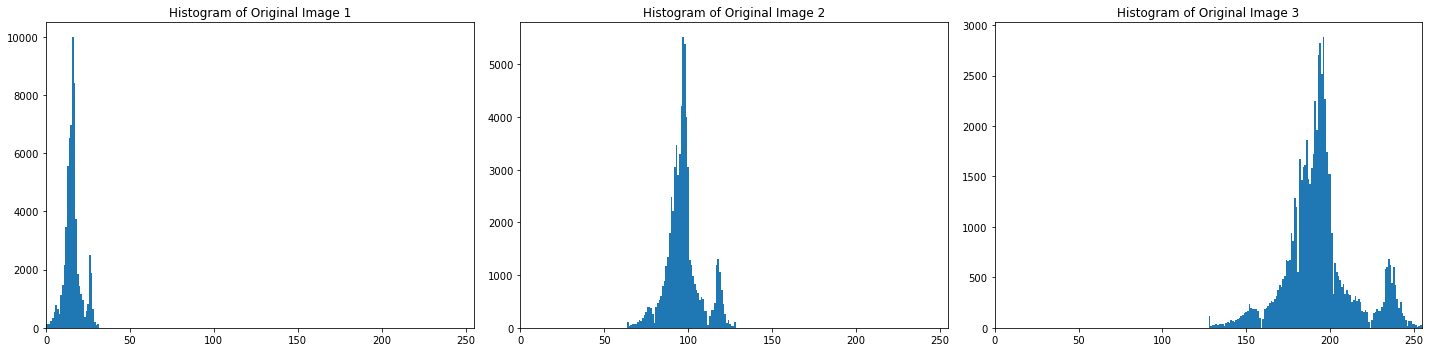

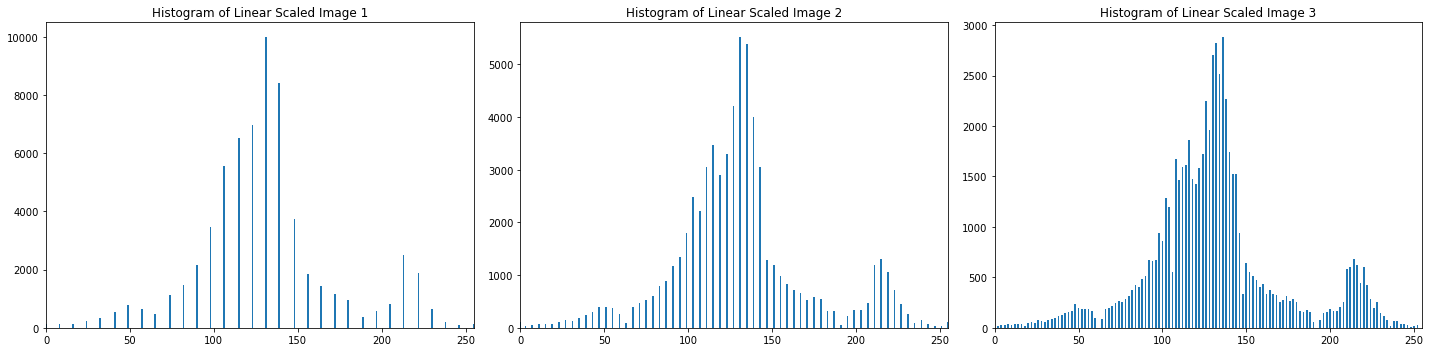

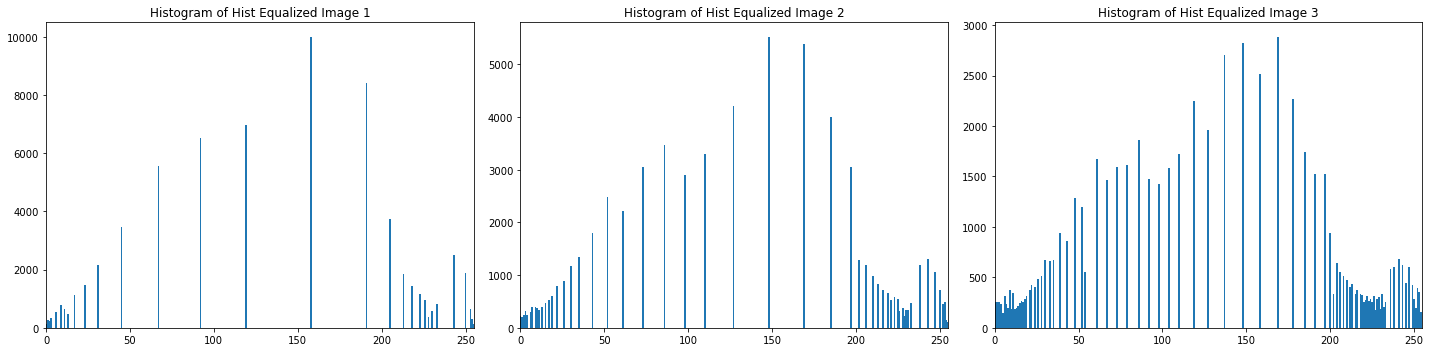

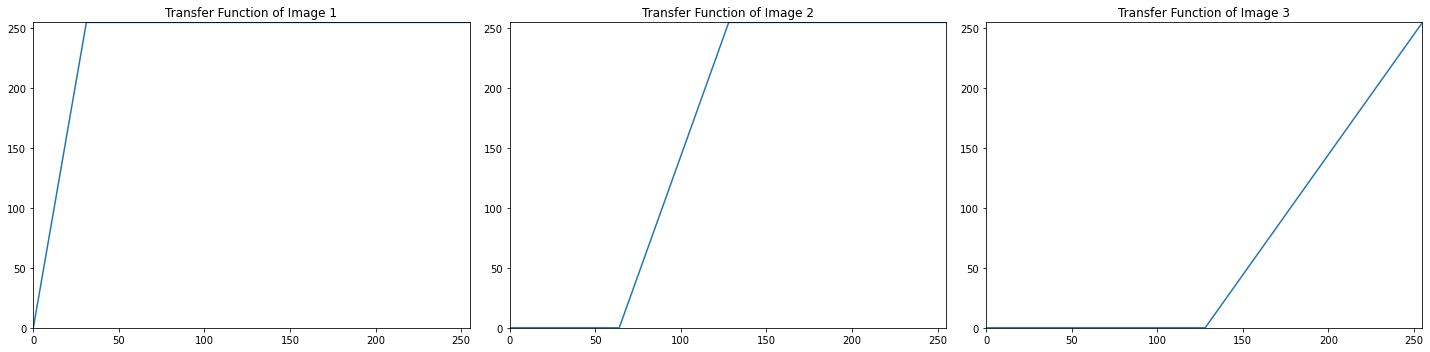

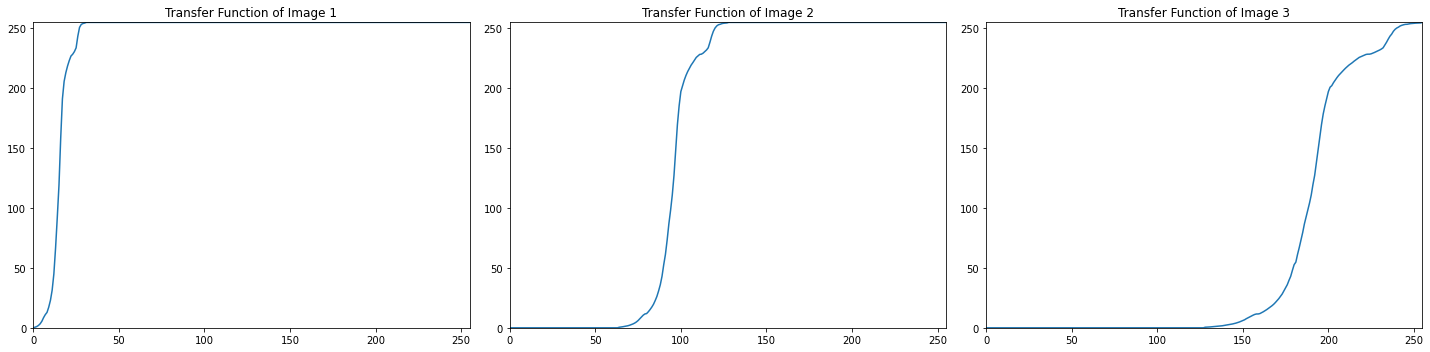

In [3]:
#Problem 2: Image Enhancement HISTOGRAM
import numpy as np
import matplotlib.pyplot as plt

# Function to manually calculate histogram
def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

# Function to plot histograms
def plot_histograms(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        histogram = calculate_histogram(image)
        axs[i].bar(range(256), histogram, width=1)
        axs[i].set_title(title)
        axs[i].set_xlim(0, 255)
    plt.tight_layout()
    plt.show()

# Function to plot transfer functions
def plot_transfer_functions(images, method):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    for i, image in enumerate(images):
        if method == "linear_scaling":
            min_pixel_value = np.min(image)
            max_pixel_value = np.max(image)
            transfer_function = np.clip((np.arange(256) - min_pixel_value) * 255 / (max_pixel_value - min_pixel_value), 0, 255)
        else:  # histogram equalization
            histogram = calculate_histogram(image)
            cdf = np.cumsum(histogram)
            cdf_min = np.min(cdf)
            transfer_function = (cdf - cdf_min) * 255 / (cdf[-1] - cdf_min)
        axs[i].plot(range(256), transfer_function)
        axs[i].set_title(f"Transfer Function of Image {i+1}")
        axs[i].set_xlim(0, 255)
        axs[i].set_ylim(0, 255)
    plt.tight_layout()
    plt.show()

def full_range_linear_scaling(image):
    min_val = np.min(image)
    max_val = np.max(image)
    scaled_image = ((image - min_val) / (max_val - min_val)) * 255
    return scaled_image.astype(np.uint8)

def histogram_equalization_manual(image):
    histogram, bins = np.zeros(256), np.arange(256)
    for pixel in image.ravel():
        histogram[pixel] += 1
    cdf = np.cumsum(histogram) / np.sum(histogram)  # Normalized Cumulative Distribution Function (CDF)
    equalized_image = np.interp(image.ravel(), bins, cdf * 255).reshape(image.shape).astype(np.uint8)
    return equalized_image


# Reading and processing the images
image_paths = ["./Project1_Files/Images/rose_dark.raw", "./Project1_Files/Images/rose_mid.raw", "./Project1_Files/Images/rose_bright.raw"]
image_shape = (256, 256)  # Assuming the images are 256x256

# Reading the images from the provided paths and reshaping them to 256x256
images = [np.fromfile(path, dtype=np.uint8).reshape(image_shape) for path in image_paths]

# Applying the full range linear scaling method
linear_scaled_images = [full_range_linear_scaling(img) for img in images]

# Applying the histogram equalization method
hist_equalized_images = [histogram_equalization_manual(img) for img in images]

# Plotting histograms of the original images
plot_histograms(images, ["Histogram of Original Image 1", "Histogram of Original Image 2", "Histogram of Original Image 3"])

# Plotting histograms of the linear scaled images
plot_histograms(linear_scaled_images, ["Histogram of Linear Scaled Image 1", "Histogram of Linear Scaled Image 2", "Histogram of Linear Scaled Image 3"])

# Plotting histograms of the histogram equalized images
plot_histograms(hist_equalized_images, ["Histogram of Hist Equalized Image 1", "Histogram of Hist Equalized Image 2", "Histogram of Hist Equalized Image 3"])

# Plotting transfer functions of the linear scaled images
plot_transfer_functions(images, "linear_scaling")

# Plotting transfer functions of the histogram equalized images
plot_transfer_functions(images, "hist_equalization")

